# CS-E5710 BAYESIAN DATA ANALYSIS - PROJECT

## INTRODUCTION
The (anticipated) heart condition is crucial information for giving proper medical decisions and saving lives. The misdiagnosis of heart disease may cause serious problems, including being left undiagnosed and untreated, even irreversibly damaged in the heart muscle and can be life-threatening. Therefore, the correct diagnosis of heart disease status is extremely vital not only patients’ health but also their live.
However, the heart disease status cannot be diagnosed easily because there are many blood vessels in human body which lead to heart and it is very expensive and time consuming to check all the blood vessels’ condition by imaging method such as coronary angiogram. Therefore, before having the decision whether or not conducting complicate examination techniques, it is important for the doctor to accurately assess the patients’ heart condition based on easy to measure biometric parameters such as such as age, sex, chest paint types, resting blood vessels or blood cholesterol levels etc.

The report is divided into ... different sections:\
• **Section 1** introduces about the application domain of the Heart Disease Detection ML problem\
• **Section 2** explains how the Bayesian problem is formulated. The aim of this section is to define what data points represent and which properties of a data point are used as its features and labels.\
• **Section 3** visulized the data and relation between the features and the labels\
• ...

## PROBLEM FORMULATION
Our application can be modelled as Machine Learning problem with **data points** representing patients who have already carried out heart tests. Each data point is characterized by 13 different health parameters such as age, sex, chest pain type, resting blood pressure, etc. as its **features**. The **label** (quantity of interest) of the data point is heart disease status (value 0: no presence heart disease and 1: presence heart disease).
We gathered the data points with known label values using the patients’ health data recording available from UC Irvine machine learning heart disease repository which can be accessed via the link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

The above data repository consists the health record data from 4 different locations such as Cleveland and Long Beach of America, Switzerland, and Hungary. However, only the Cleveland’s dataset is in good condition and being maintained. All other datasets are in very poor condition which have a lot of missing data. Therefore, we use Cleveland dataset which consists of 303 data points for our machine learning problem.

# DATA VISULIZATION

1. age
2. sex: 0: female, 1: male
3. cp: chest pain type (4 values) 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic
4. trestbps: resting blood pressure
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
7. restecg: resting electrocardiographic results (values 0 = normal, 1 = having ST-T wave abnormality, 2 = showing proable or definite left ventricular hypertrophy by Estes's criteria)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-4) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: angiographic disease status (0 = <50% diameter narrowing _ no presence, 1 = >50% diameter narrowing _ presence)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read csv file
df = pd.read_csv('heart.csv')


### Check if there is any missing varibale
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
### Normalizing numeric features value
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[col_to_scale] = SS.fit_transform(df[col_to_scale])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

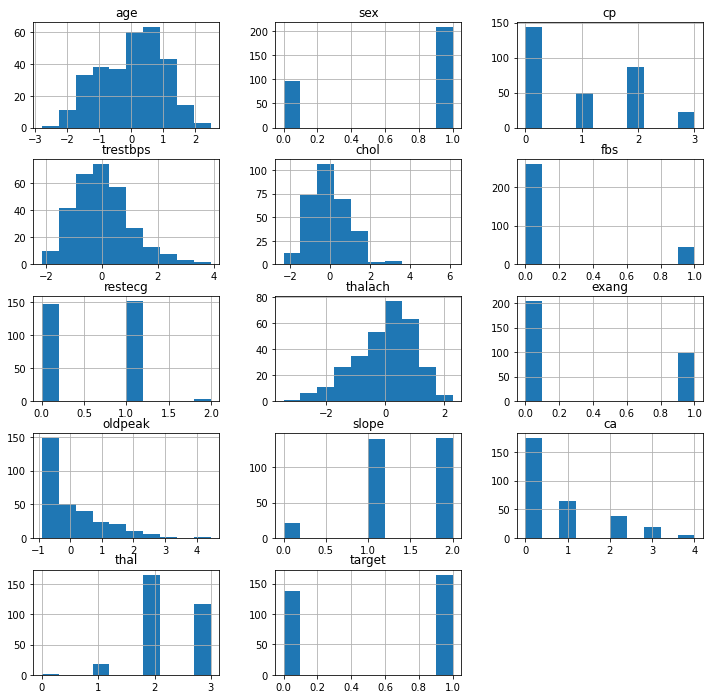

In [4]:
### Draw histogram of all the features
df.hist(figsize=(12,12), layout=(5,3))